In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import csv
import glob


In [2]:
x = np.load("./results/Hamiltonian_ibm_fez_0/16_0/p=20/samples_D=32_MPS_chi=4.npy", allow_pickle=True).item()

In [10]:
fname = f"./problems/transfer_Hamiltonian_ibm_fez_0.pkl"
data = np.load(fname, allow_pickle=True)
sample = x['samples'][0]

eng=0
for k, v in data["H"].items():
    val = 1
    for i in k:
        val *= sample[i]
    eng += v * val

In [11]:
eng

np.int64(-234)

In [4]:
def plot_energy_lin(p):

    lowesa_x = list(x ** 0.5 for x in ref[p]['en'].keys())
    lowesa_y = list(sum(x.values()) for x in ref[p]['en'].values())

    
    clrs = {"BP": 'blue', "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    miny = 0
    maxy = -1000
    for i, r in enumerate([3, 4]):
        if r in res[p]:
            for pt in res[p][r]:
                mrk = 'x' if pt["chi"] == '1' else '+'
                clr = clrs[pt["which"]]
                ax[i].scatter([1 / float(pt["D"])], float(pt["eng"]),
                            marker=mrk, color=clr, s=50)
                miny = min(miny, float(pt["eng"]))
                maxy = max(maxy, float(pt["eng"]))

        ax[i].plot(lowesa_x, lowesa_y, '-x', label='lowesa')
        miny = min(min(lowesa_y), miny)
        maxy = min(min(lowesa_y), maxy) + 4

        ax[i].set_xscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'eng')
        ax[i].set_ylim(miny-1, maxy+1)
        ax[i].set_xlim(1e-3, 1)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='chi=2')
        ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
    # plt.legend()
# plt.show()

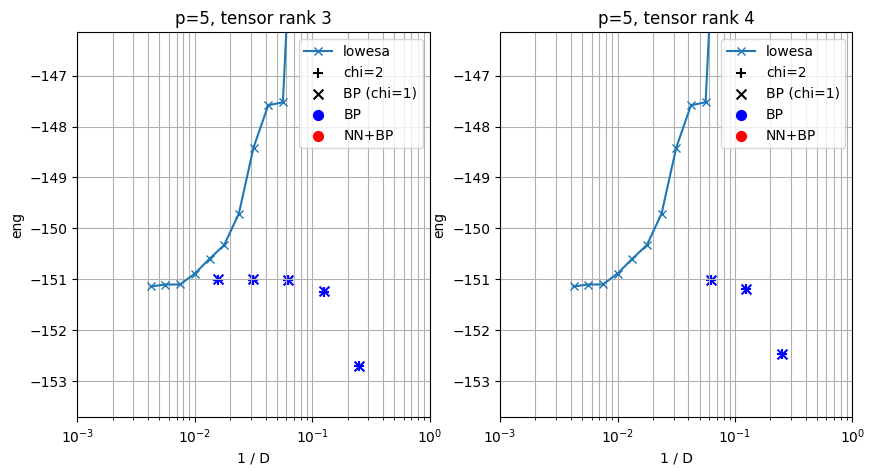

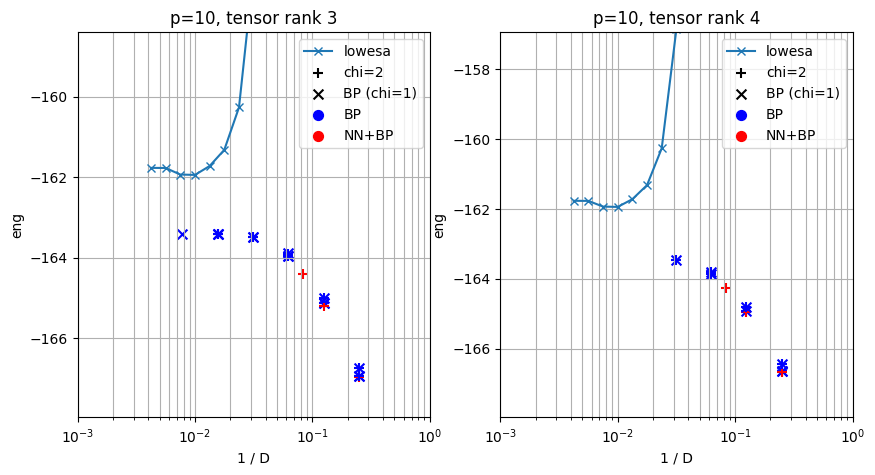

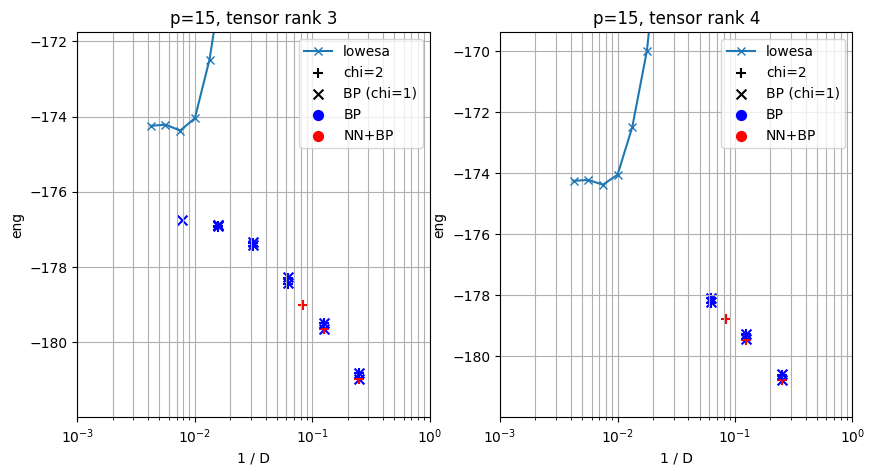

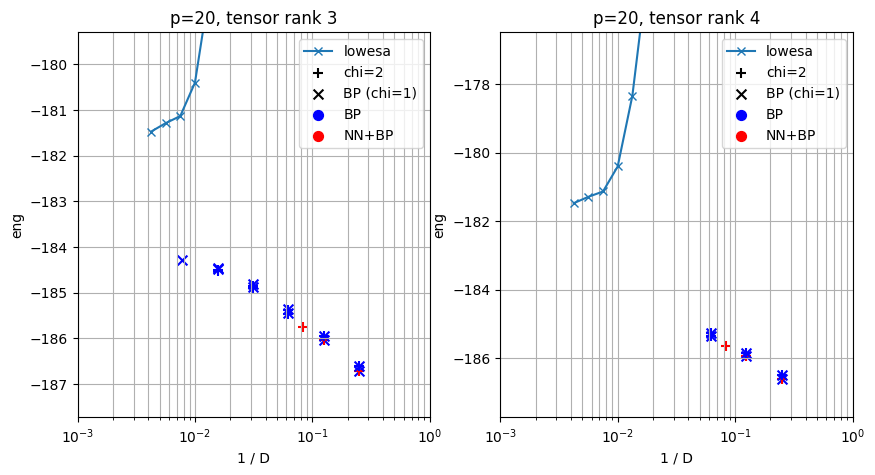

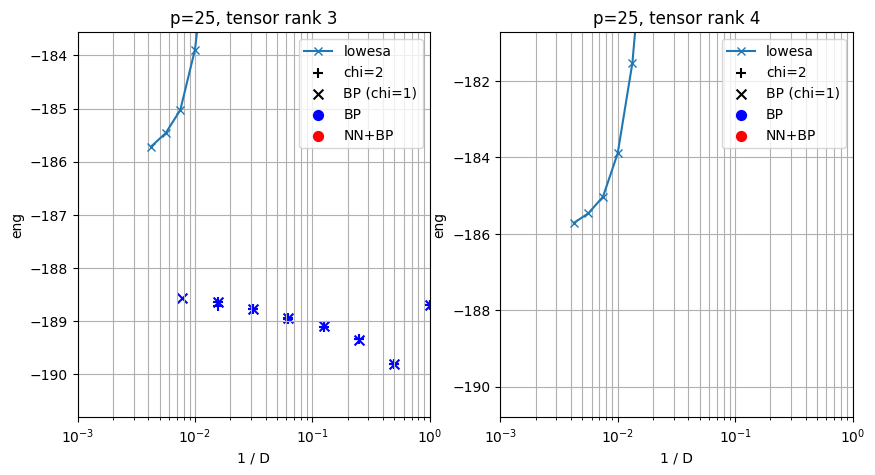

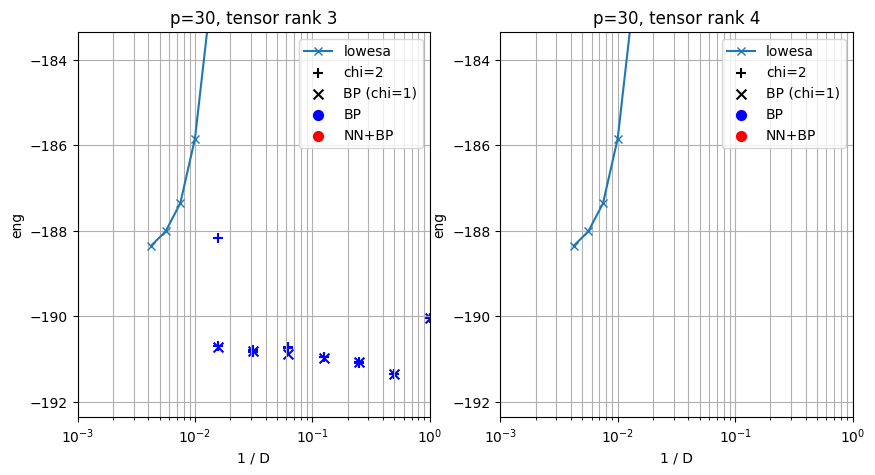

In [5]:
plot_energy_lin(5)
plot_energy_lin(10)
plot_energy_lin(15)
plot_energy_lin(20)
plot_energy_lin(25)
plot_energy_lin(30)

In [29]:
ress = {}
for ff in glob.glob("/home/marek/hex/results/Hamiltonian_ibm_kyiv_0/16_0/p=5/*.npy"):
    fff = ff.split("/")[-1]
    ggg = fff[10:-4].split("_")
    pp = int(ggg[0])
    rr = int(ggg[1].split("=")[1])
    DD = int(ggg[2].split("=")[1])
    cc = int(ggg[-1].split("=")[1])
    ind = (pp, rr, DD, cc)
    ress[ind] = np.load(ff, allow_pickle=True).item()

Text(0.5, 1.0, 'kiey0  p=5')

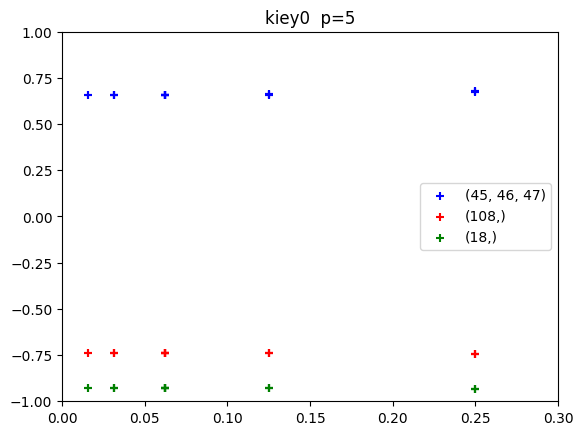

In [34]:
for ss, cl in zip([(45, 46, 47), (108,), (18,)], 'brg'):
    for ind, rr in ress.items():
        plt.scatter([1 / ind[2]], rr[ss] * ref[5]['H'][ss] , marker='+', color=cl)

for ss, cl in zip([(45, 46, 47), (108,), (18,)], 'brg'):
    plt.scatter([1.2], [1.2] , marker='+', color=cl, label=f"{ss}")
plt.legend()
plt.xlim([0, 0.3])
plt.ylim([-1, 1])
plt.title("kiey0  p=5")


In [12]:
def plot_energy(p):

    eng0 = {5: -145.5, 10: -159}
    ind_ref = min(ref[p]['en'].keys())
    eng0[p] = sum(ref[p]['en'][ind_ref].values())

    eng00 = max(float(x['eng']) for i, r in enumerate([3, ]) for x in res[p][r] ) + 0.1
    print(eng00)

    clrs = {"BP": 'blue', "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    for i, r in enumerate([3, 4]):
        if r in res[p]:
            for pt in res[p][r]:
                mrk = 'x' if pt["chi"] == '1' else '+'
                clr = clrs[pt["which"]]
                ax[i].scatter([1 / float(pt["D"])], eng00 - float(pt["eng"]),
                            marker=mrk, color=clr, s=50)

        ax[i].set_yscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'{eng0[p]} - eng')
        ax[i].set_ylim(1e-2, 10)
        ax[i].set_xlim(0, 0.26)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='chi=2')
        ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
    # plt.legend()
# plt.show()

-150.90566271139463
-163.30010452892782
-176.6566943008547
-184.1953509550293
-188.46246454268677
-188.06428437458075


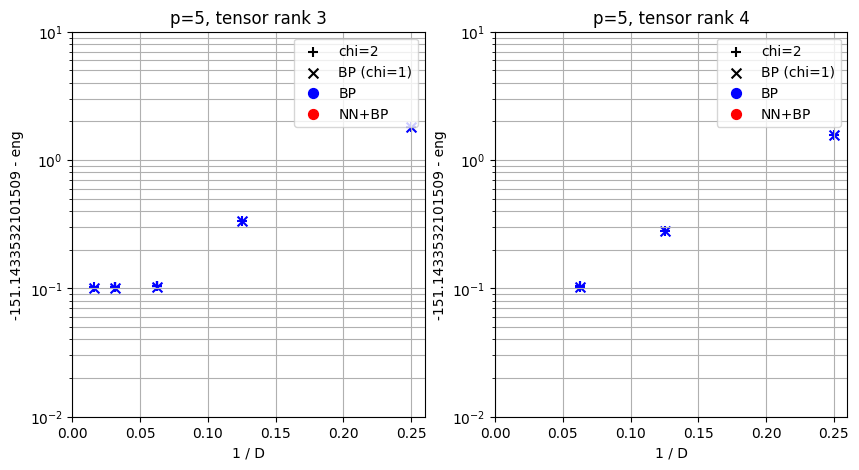

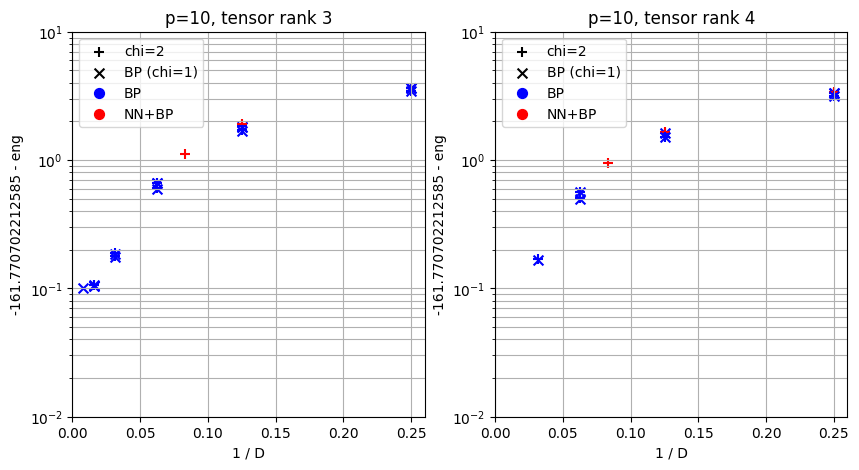

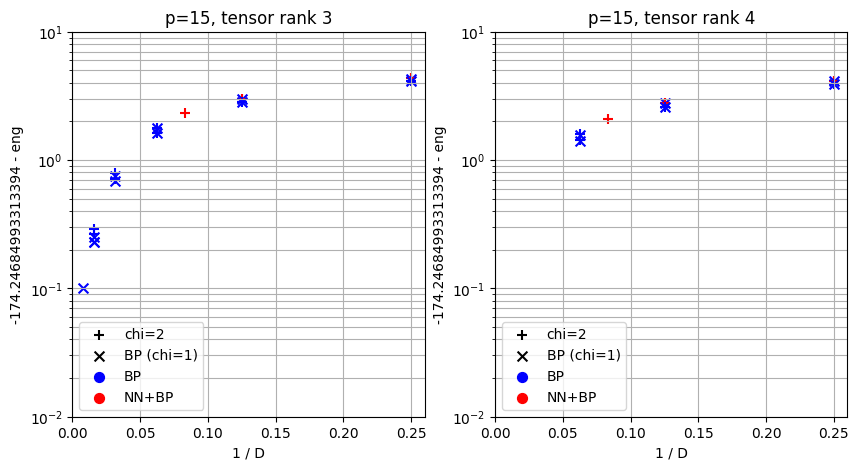

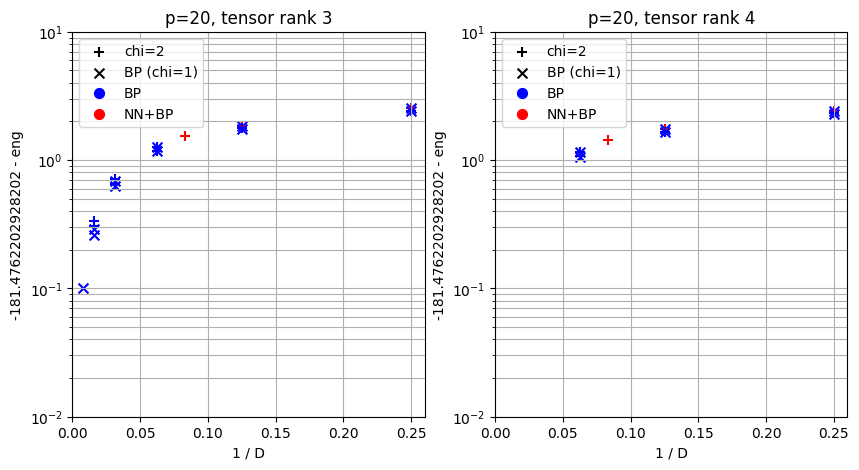

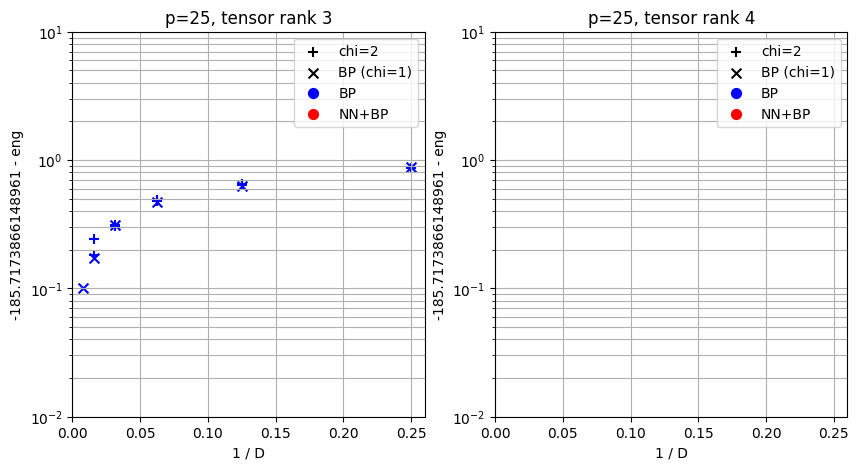

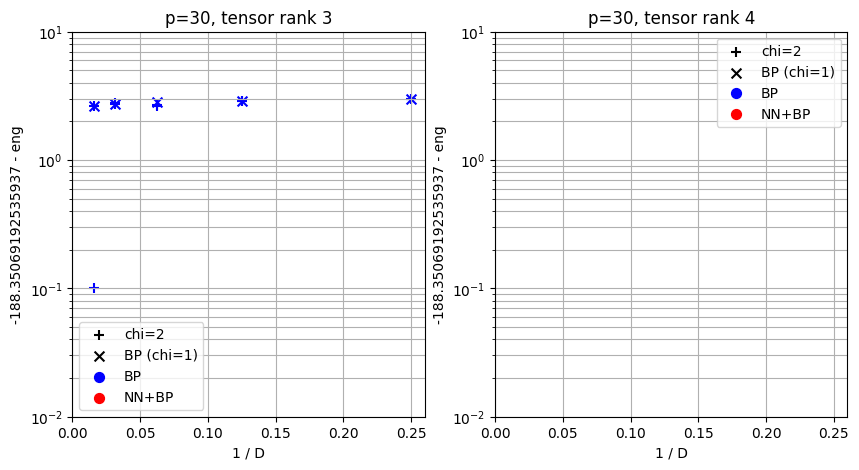

In [13]:
plot_energy(p=5)
plot_energy(p=10)
plot_energy(p=15)
plot_energy(p=20)
plot_energy(p=25)
plot_energy(p=30)

In [14]:
def plot_contraction_comparison(p):
    clrs = {"BP": 'blue',  "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    for i, r in enumerate([3, 4]):
        if r in res[p]:
            res_eng = {(pt["which"], pt["D"], pt["chi"]): float(pt["eng"]) for pt in res[p][r]}

            for (which, D, chi), eng in res_eng.items():
                if chi != '1' and (which, D, '1') in res_eng:
                    dE = eng - res_eng[(which, D, '1')]
                    clr = clrs[which]
                    ax[i].scatter([1 / float(D)], abs(dE),
                                marker='+', color=clr, s=100)

        ax[i].set_yscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'|eng(MPS chi=2) - eng(BP chi=1)|')
        ax[i].set_ylim(1e-4, 1e-1)
        ax[i].set_xlim(0, 0.26)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        # ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='MPS chi=4*D')
        # ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            if k == 'BP':
                ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
        # plt.legend()
    # plt.show()

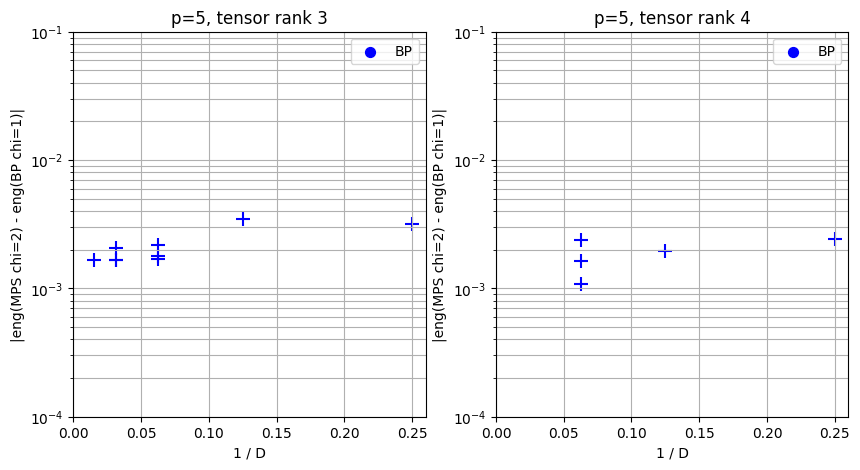

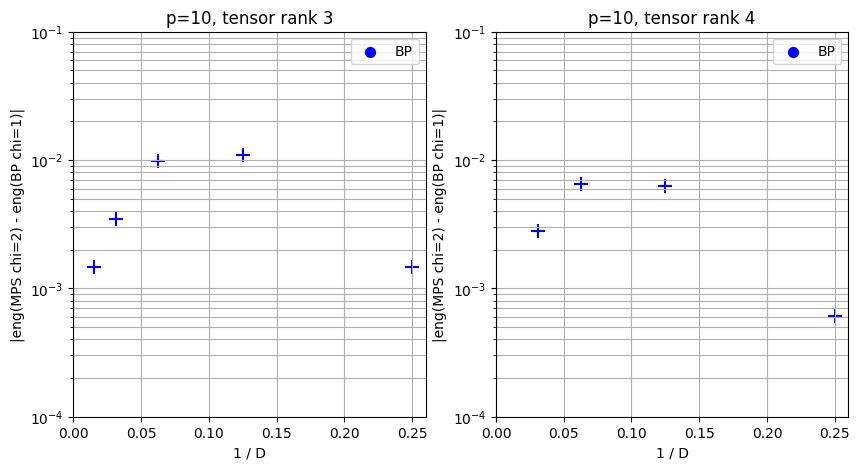

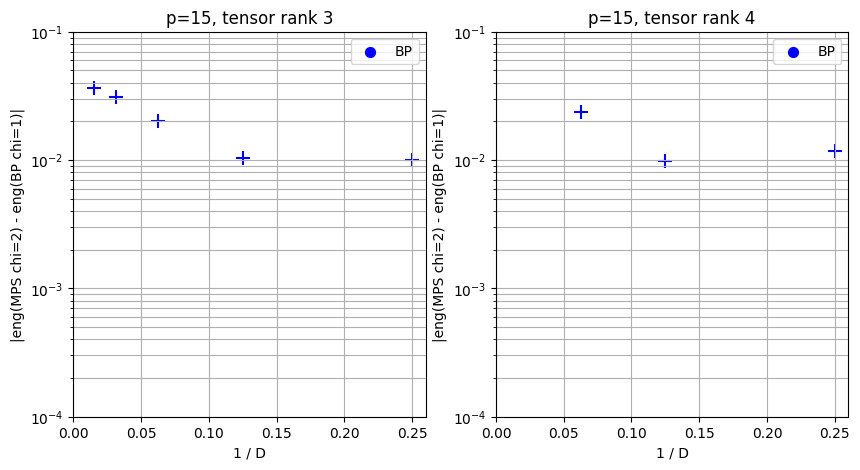

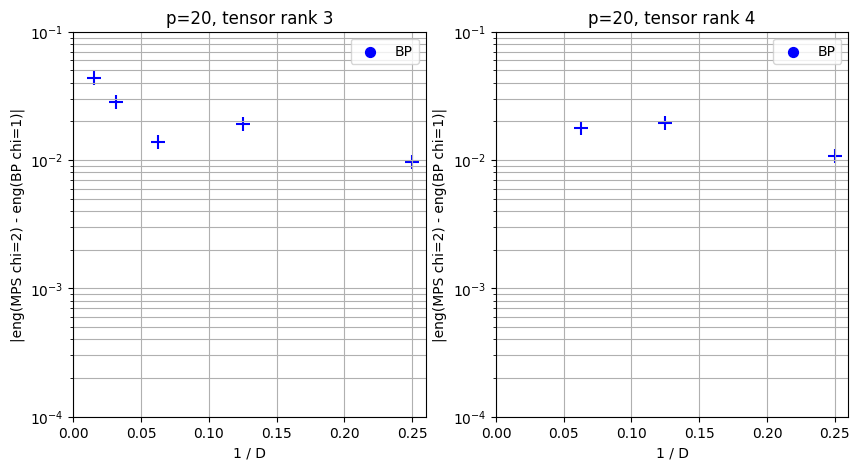

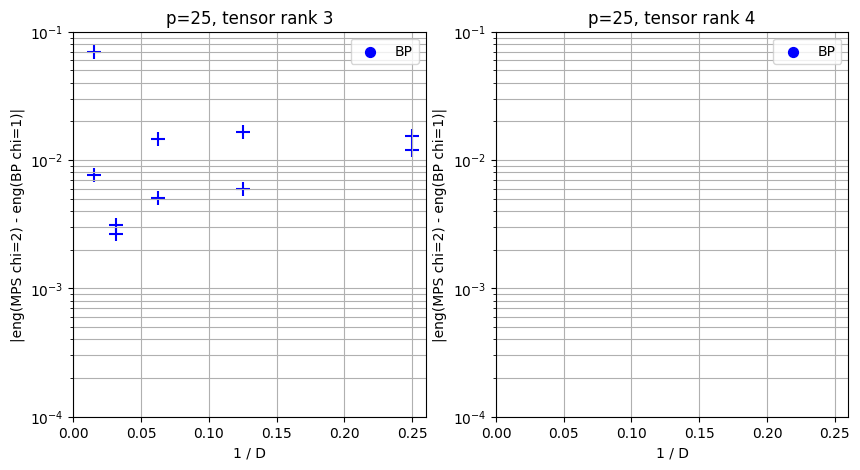

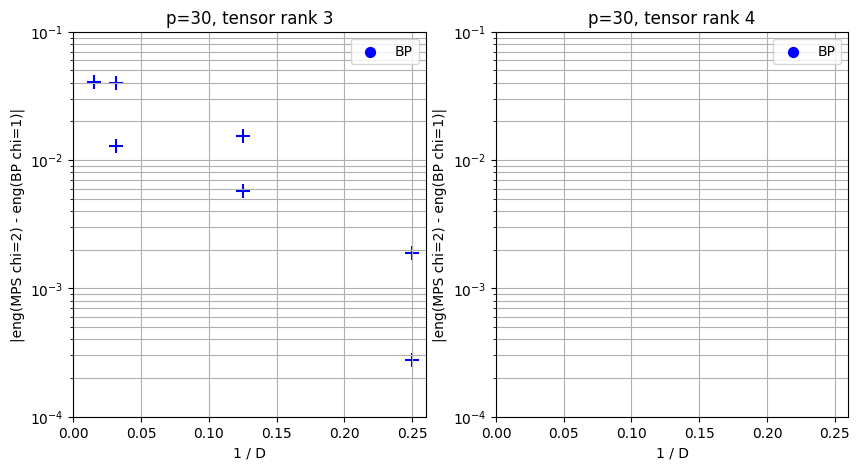

In [15]:
plot_contraction_comparison(p=5)
plot_contraction_comparison(p=10)
plot_contraction_comparison(p=15)
plot_contraction_comparison(p=20)
plot_contraction_comparison(p=25)
plot_contraction_comparison(p=30)

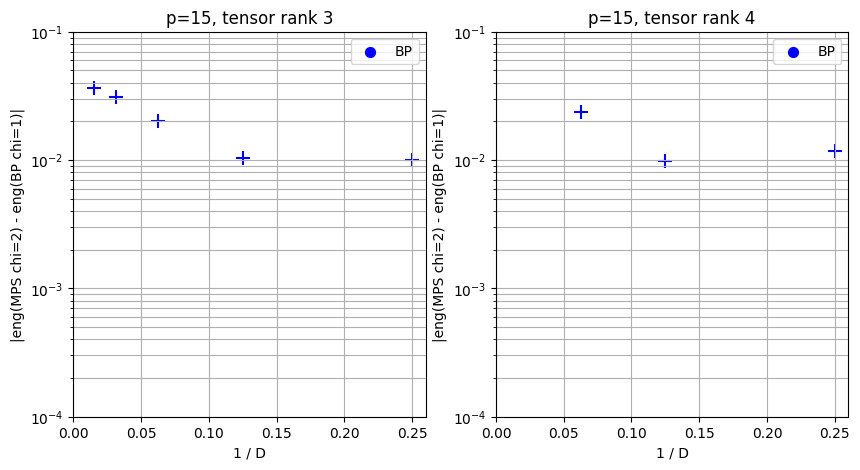

In [43]:
plot_contraction_comparison(p=15)